# Loan Test Data Preparation

## This notebook is for Data Cleaning and Feature Engineering

**==============================================================================================================**

## Data Dictionary

![image](desc.png)

**==============================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date, time


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Binarizer 
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
import feature_engine

from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, DropMissingData, MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer, RandomSampleImputer

from feature_engine.outliers import Winsorizer, ArbitraryOutlierCapper, OutlierTrimmer

from feature_engine.encoding import CountFrequencyEncoder, DecisionTreeEncoder, MeanEncoder, OneHotEncoder
from feature_engine.encoding import OrdinalEncoder, WoEEncoder, RareLabelEncoder, StringSimilarityEncoder

from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, ArbitraryDiscretiser
from feature_engine.discretisation import DecisionTreeDiscretiser, EqualWidthDiscretiser

from feature_engine.datetime import DatetimeFeatures

from feature_engine.creation import CyclicalFeatures, MathFeatures, RelativeFeatures


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Data Quick Glance

In [2]:
df = pd.read_csv("testmod.csv")

In [3]:
df.head()

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,degree,masters,highschool,fulltime,unemployed,selfemployed,divorced,married,hasmortgage,hasdependents,otherloans,autoloans,businessloans,homeloans,hascosigner
0,32,131645,43797,802,23,2,6.10,24,0.13,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0
1,61,134312,18402,369,87,2,12.99,60,0.59,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,55,115809,151774,563,3,3,5.51,48,0.82,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1
3,58,94970,55789,337,24,1,23.93,36,0.77,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,63,71727,189798,451,52,3,22.05,48,0.44,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             109435 non-null  int64  
 1   income          109435 non-null  int64  
 2   loanamount      109435 non-null  int64  
 3   creditscore     109435 non-null  int64  
 4   monthsemployed  109435 non-null  int64  
 5   numcreditlines  109435 non-null  int64  
 6   interestrate    109435 non-null  float64
 7   loanterm        109435 non-null  int64  
 8   dtiratio        109435 non-null  float64
 9   degree          109435 non-null  int64  
 10  masters         109435 non-null  int64  
 11  highschool      109435 non-null  int64  
 12  fulltime        109435 non-null  int64  
 13  unemployed      109435 non-null  int64  
 14  selfemployed    109435 non-null  int64  
 15  divorced        109435 non-null  int64  
 16  married         109435 non-null  int64  
 17  hasmortgag

In [5]:
df.dtypes.value_counts()

int64      22
float64     2
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,degree,masters,highschool,fulltime,unemployed,selfemployed,divorced,married,hasmortgage,hasdependents,otherloans,autoloans,businessloans,homeloans,hascosigner
count,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00,109435.00
mean,43.54,82487.39,127486.54,574.67,59.58,2.50,13.50,36.09,0.50,0.25,0.25,0.25,0.25,0.25,0.25,0.33,0.33,0.50,0.50,0.20,0.20,0.20,0.20,0.50
std,15.02,38966.03,70703.10,158.80,34.55,1.12,6.65,16.93,0.23,0.44,0.43,0.43,0.43,0.43,0.43,0.47,0.47,0.50,0.50,0.40,0.40,0.40,0.40,0.50
min,18.00,15003.00,5002.00,300.00,0.00,1.00,2.00,12.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,31.00,48745.00,66173.50,437.00,30.00,2.00,7.75,24.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,44.00,82545.00,127345.00,575.00,60.00,3.00,13.50,36.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,57.00,116184.00,188674.00,712.00,89.00,4.00,19.27,48.00,0.70,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
max,69.00,149999.00,249995.00,849.00,119.00,4.00,25.00,60.00,0.90,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Overall Visualization

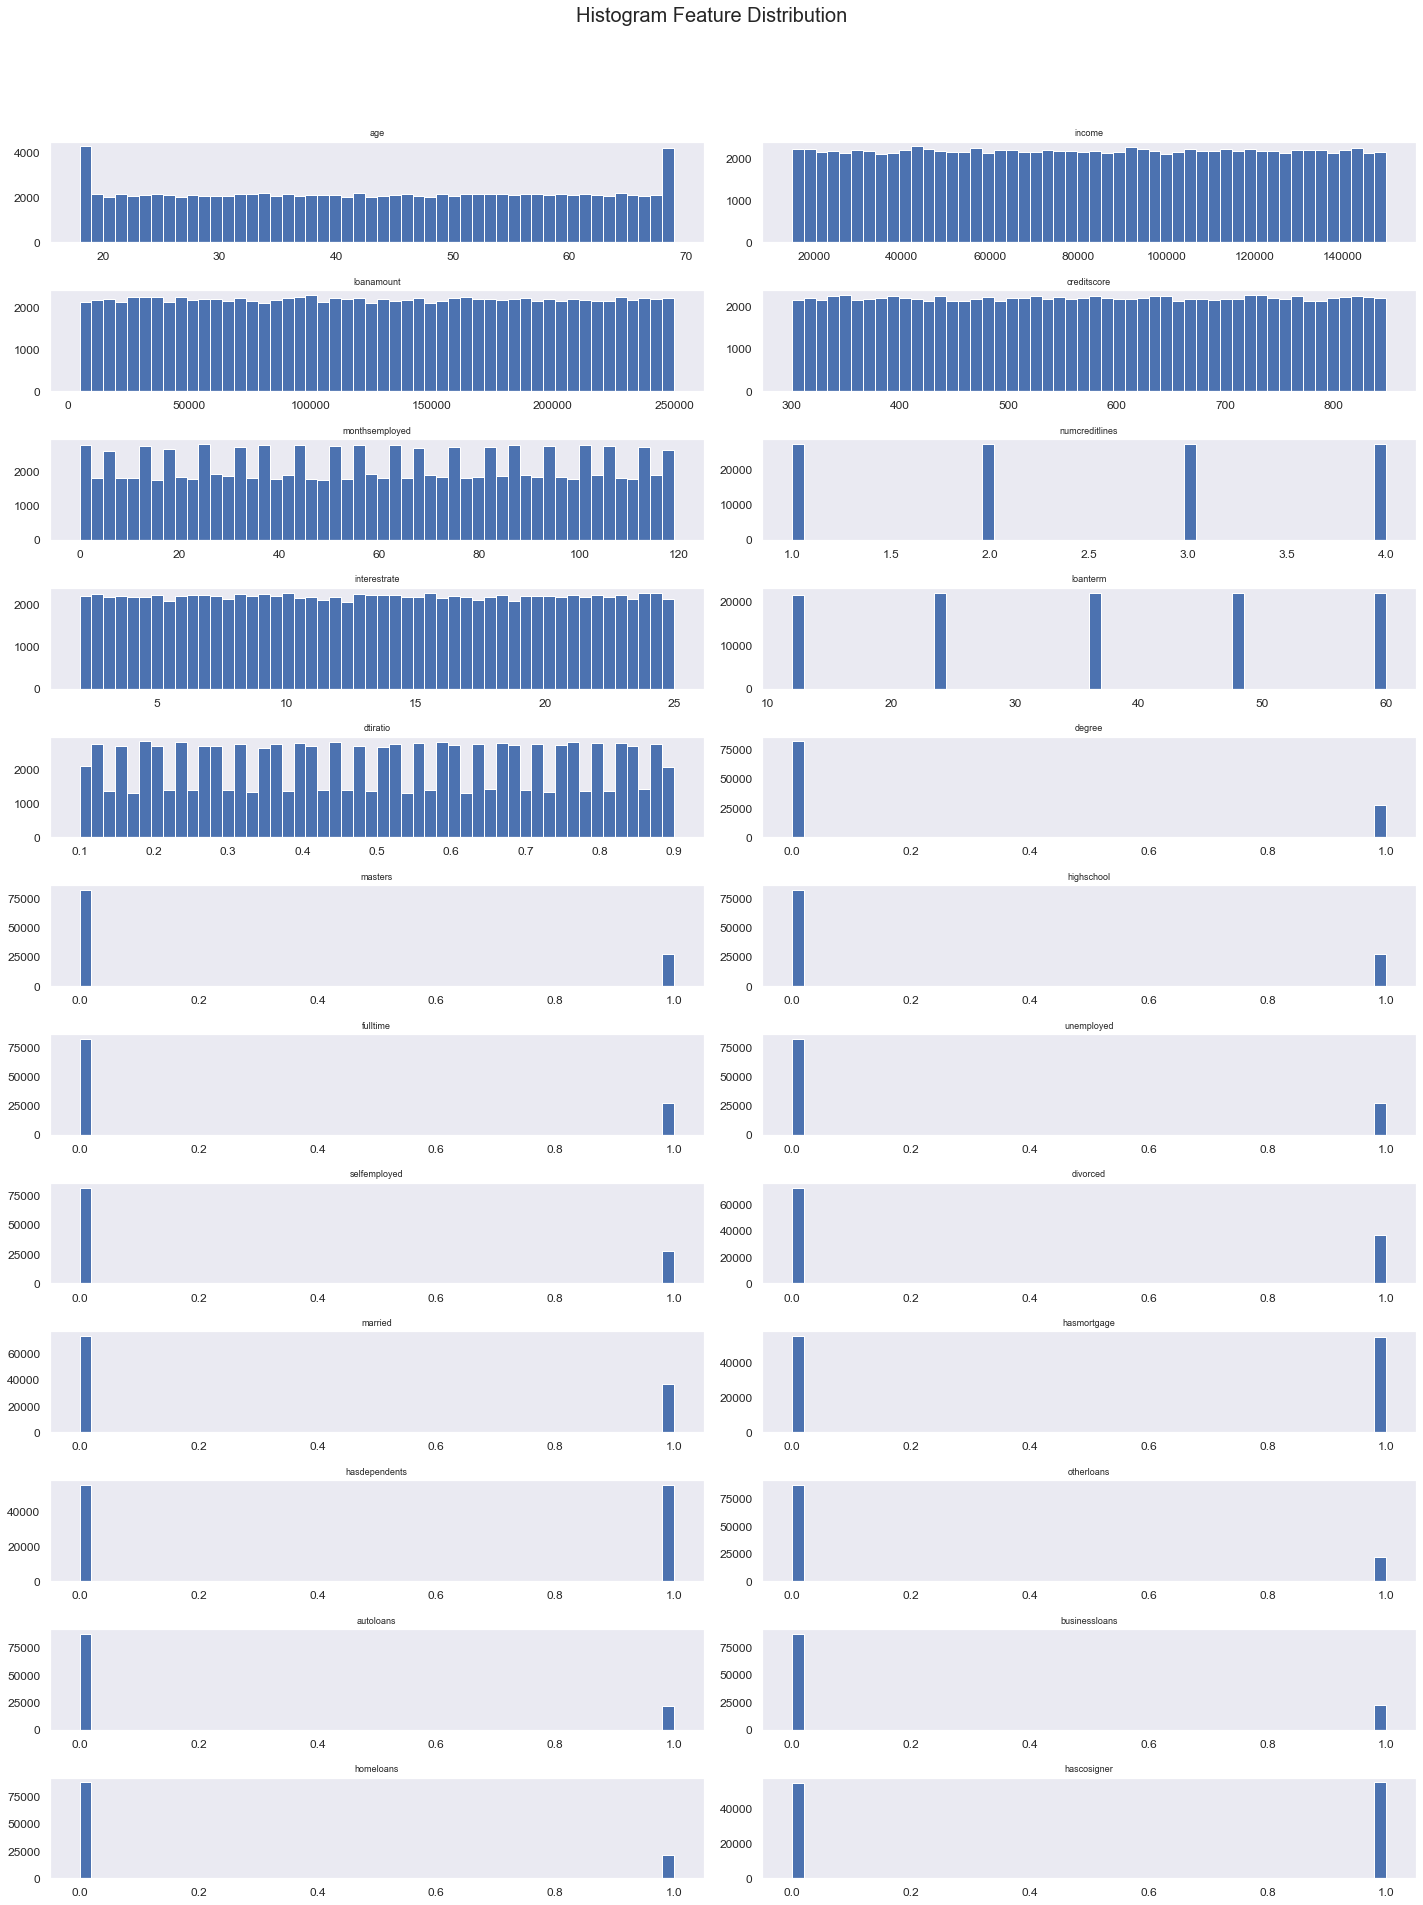

In [7]:
df.hist(bins=50, figsize=(20,50), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

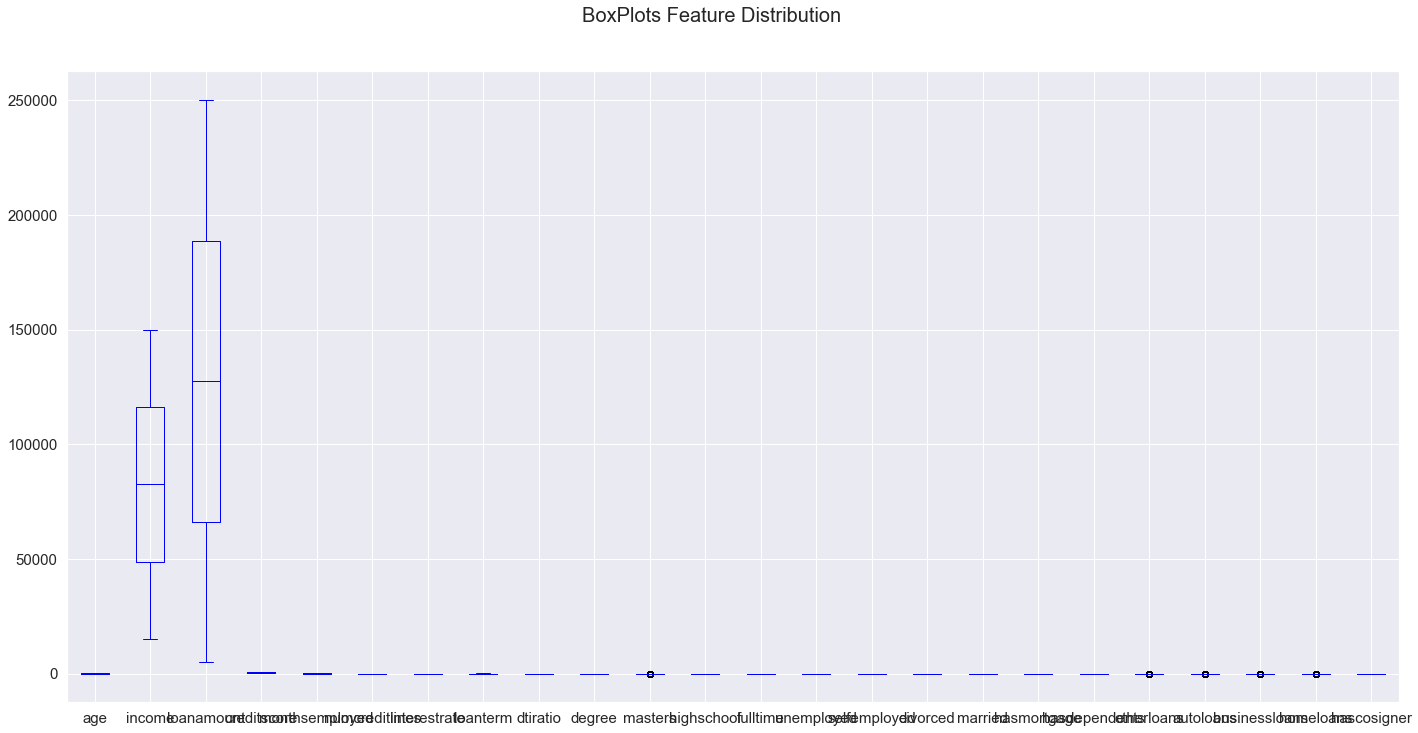

In [8]:
df.boxplot(figsize=(20,10), color='blue', fontsize=15)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

**==============================================================================================================**

# Data Preprocessing

# Feature Engineering

  * **Feature selection**
    * Removing uninformative features
  * **Feature extraction**
    * Creating new features from existing features
  * **Feature transformation**
    * Modifying existing features to better suit our objectives
    * Encoding of categorical features as dummies
 
When modeling, best practice is to perform a rigorous examination of your data before beginning feature engineering and feature selection. This process is important. Not only does it help you understand your data, what it's telling you, and what it's _not_ telling you, but it also can give you clues that help you create new features. 

### Drop unwanted features (Based on Domain Knowledge)

In [9]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,degree,masters,highschool,fulltime,unemployed,selfemployed,divorced,married,hasmortgage,hasdependents,otherloans,autoloans,businessloans,homeloans,hascosigner
0,32,131645,43797,802,23,2,6.10,24,0.13,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0


In [10]:
df.columns

Index(['age', 'income', 'loanamount', 'creditscore', 'monthsemployed', 'numcreditlines', 'interestrate', 'loanterm', 'dtiratio', 'degree', 'masters', 'highschool', 'fulltime', 'unemployed', 'selfemployed', 'divorced', 'married', 'hasmortgage', 'hasdependents', 'otherloans', 'autoloans', 'businessloans', 'homeloans', 'hascosigner'], dtype='object')

In [12]:
#df.drop(['LoanID'], axis=1, inplace=True)

In [13]:
df.head()

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,degree,masters,highschool,fulltime,unemployed,selfemployed,divorced,married,hasmortgage,hasdependents,otherloans,autoloans,businessloans,homeloans,hascosigner
0,32,131645,43797,802,23,2,6.10,24,0.13,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0
1,61,134312,18402,369,87,2,12.99,60,0.59,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
2,55,115809,151774,563,3,3,5.51,48,0.82,1,0,0,1,0,0,0,0,1,1,1,0,0,0,1
3,58,94970,55789,337,24,1,23.93,36,0.77,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,63,71727,189798,451,52,3,22.05,48,0.44,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


In [14]:
df.tail()

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,degree,masters,highschool,fulltime,unemployed,selfemployed,divorced,married,hasmortgage,hasdependents,otherloans,autoloans,businessloans,homeloans,hascosigner
109430,67,76970,108110,404,67,3,10.51,36,0.18,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0
109431,44,108272,238508,335,28,1,9.65,24,0.32,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0
109432,54,73526,18513,576,75,2,17.22,36,0.62,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
109433,60,75296,38414,369,71,4,17.69,36,0.66,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
109434,18,19144,222659,531,1,4,15.28,48,0.10,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1


In [15]:
#df.to_csv("testmod.csv", index=False)

## Rename columns

In [16]:
df.columns

Index(['age', 'income', 'loanamount', 'creditscore', 'monthsemployed', 'numcreditlines', 'interestrate', 'loanterm', 'dtiratio', 'degree', 'masters', 'highschool', 'fulltime', 'unemployed', 'selfemployed', 'divorced', 'married', 'hasmortgage', 'hasdependents', 'otherloans', 'autoloans', 'businessloans', 'homeloans', 'hascosigner'], dtype='object')

In [ ]:
#Method 3: Using a new list of column names

# Creating a list of new columns
df_cols = ['age', 'income', 'loanamount', 'creditscore', 'monthsemployed', 'numcreditlines', 
           'interestrate', 'loanterm', 'dtiratio', 
           'degree', 'masters', 'highschool', 'fulltime', 'unemployed', 'selfemployed', 'divorced', 
           'married', 'hasmortgage', 'hasdependents', 'otherloans', 'autoloans', 'businessloans', 
           'homeloans', 'hascosigner'
          ]

# printing the columns
# before renaming
print(df.columns)

# Renaming the columns
df.columns = df_cols

# printing the columns
# after renaming
print(df.columns)


In [ ]:
# make all column headers in pandas data frame lower case

df.columns = map(str.lower, df.columns)

In [ ]:
df.columns

In [ ]:
#df.to_csv("testmod.csv", index=False)

**==============================================================================================================**

## Treat Missing Values

<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this documentation).

There are several options for dealing with missing values. We will use 'Lot Frontage' feature to analyze for missing values.

1. We can drop the missing values, using `dropna()` method.

2. We can drop the whole attribute (column), that contains missing values, using the `drop()` method.

3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.

In [17]:
df.isnull().sum()

age               0
income            0
loanamount        0
creditscore       0
monthsemployed    0
numcreditlines    0
interestrate      0
loanterm          0
dtiratio          0
degree            0
masters           0
highschool        0
fulltime          0
unemployed        0
selfemployed      0
divorced          0
married           0
hasmortgage       0
hasdependents     0
otherloans        0
autoloans         0
businessloans     0
homeloans         0
hascosigner       0
dtype: int64

**==============================================================================================================**

## Treat Duplicate Values

In [18]:
df.duplicated(keep='first').sum()

0

**==============================================================================================================**

## One-hot encoding

There are three unique values: France, Spain, and Germany. Let's encode this data so it can be represented using Boolean features. We'll use a pandas function called `pd.get_dummies()` to do this.

When we call `pd.get_dummies()` on this feature, it will replace the `Geography` column with three new Boolean columns--one for each possible category contained in the column being dummied. 

When we specify `drop_first=True` in the function call, it means that instead of replacing `Geography` with three new columns, it will instead replace it with two columns. We can do this because no information is lost from this, but the dataset is shorter and simpler.  

In this case, we end up with two new columns called `Geography_Germany` and `Geography_Spain`. We don't need a `Geography_France` column. Why not? Because if a customer's values in `Geography_Germany` and `Geography_Spain` are both 0, we'll know they're from France! 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109435 entries, 0 to 109434
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             109435 non-null  int64  
 1   income          109435 non-null  int64  
 2   loanamount      109435 non-null  int64  
 3   creditscore     109435 non-null  int64  
 4   monthsemployed  109435 non-null  int64  
 5   numcreditlines  109435 non-null  int64  
 6   interestrate    109435 non-null  float64
 7   loanterm        109435 non-null  int64  
 8   dtiratio        109435 non-null  float64
 9   degree          109435 non-null  int64  
 10  masters         109435 non-null  int64  
 11  highschool      109435 non-null  int64  
 12  fulltime        109435 non-null  int64  
 13  unemployed      109435 non-null  int64  
 14  selfemployed    109435 non-null  int64  
 15  divorced        109435 non-null  int64  
 16  married         109435 non-null  int64  
 17  hasmortgag

In [21]:
#df.describe(include="object")

In [ ]:
list(df.describe(include="object"))

In [ ]:
df["education"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.education, y=df.default, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["employmenttype"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.employmenttype, y=df.default, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["maritalstatus"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.maritalstatus, y=df.default, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["hasmortgage"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.hasmortgage, y=df.default, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["hasdependents"].value_counts().to_frame()

In [ ]:
df["loanpurpose"].value_counts().to_frame()

In [ ]:
df["hascosigner"].value_counts().to_frame()

## One Hot Encoding - Feature-engine

Just like imputation, all methods of categorical encoding should be performed over the training set, and then propagated to the test set. 

Why? 

Because these methods will "learn" patterns from the train data, and therefore you want to avoid leaking information and overfitting. But more importantly, because we don't know whether in future / live data, we will have all the categories present in the train data, or if there will be more or less categories. Therefore, we want to anticipate this uncertainty by setting the right processes right from the start. We want to create transformers that learn the categories from the train set, and used those learned categories to create the dummy variables in both train and test sets.

In [ ]:
df.columns

In [ ]:
df.describe(include="object")

In [ ]:
list(df.describe(include="object"))

In [ ]:
# set up encoder

encoder = OneHotEncoder(
    variables=['education', 'employmenttype', 'maritalstatus', 'hasmortgage', 'hasdependents', 'loanpurpose', 'hascosigner'],  # alternatively pass a list of variables
    drop_last=False,  # to return k-1, use drop=false to return k dummies
)

In [ ]:
# fit the encoder (finds categories)

encoder.fit(df)

In [ ]:
# automatically found numerical variables

encoder.variables_

In [ ]:
# we observe the learned categories

encoder.encoder_dict_

In [ ]:
# transform the data sets

df2 = encoder.transform(df)

In [ ]:
df2.head()

In [ ]:
# we can retrieve the feature names as follows:

encoder.get_feature_names_out()

```
From Train Set Features:

{'education': ["Bachelor's", "Master's", 'High School'],
 'employmenttype': ['Full-time', 'Unemployed', 'Self-employed'],
 'maritalstatus': ['Divorced', 'Married'],
 'hasmortgage': ['Yes'],
 'hasdependents': ['Yes'],
 'loanpurpose': ['Other', 'Auto', 'Business', 'Home'],
 'hascosigner': ['Yes']}
 ```
 

### Match Train Set columns

In [ ]:
df2.columns

In [ ]:
df3 = df2[['age', 'income', 'loanamount', 'creditscore', 'monthsemployed', 
           'numcreditlines', 'interestrate', 'loanterm', 'dtiratio',
           "education_Bachelor's", "education_Master's", 'education_High School',
           'employmenttype_Full-time', 'employmenttype_Unemployed', 'employmenttype_Self-employed',
           'maritalstatus_Divorced', 'maritalstatus_Married', 'hasmortgage_Yes', 'hasdependents_Yes',
           'loanpurpose_Other', 'loanpurpose_Auto', 'loanpurpose_Business', 'loanpurpose_Home', 'hascosigner_Yes'
          ]]

In [ ]:
df3.head()

In [ ]:
#df3.to_csv("testmod.csv", index=False)

**==============================================================================================================**

#### Python code done by Dennis Lam